In [2]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

/var/folders/9l/gb5zsh4n7_5dc6vk35vdn5lw0000gn/T/ipykernel_27980/1736175489.py:20: RuntimeWarning: divide by zero encountered in divide
  v_phi = c * (1 - alpha_1 / r_v)
/var/folders/9l/gb5zsh4n7_5dc6vk35vdn5lw0000gn/T/ipykernel_27980/1736175489.py:30: RuntimeWarning: divide by zero encountered in log
  plt.plot(f, 20*np.log(Z_e/max(Z_e)), label="theorie")


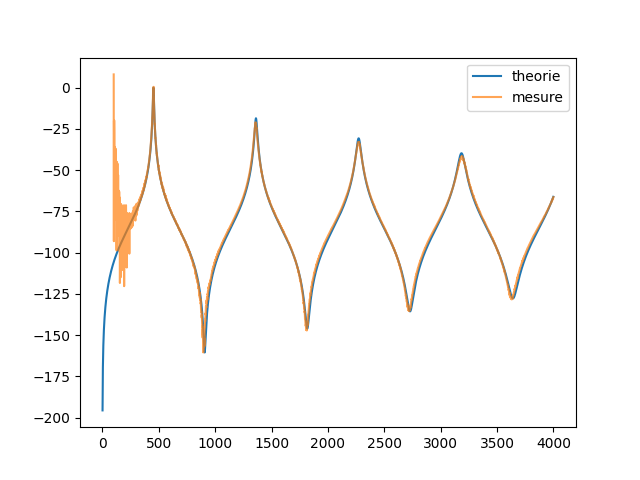

peaks theorie [ 452 1362 2272 3184]


In [24]:
f = np.arange(0, 4000)
#zegrev p.7
l = 183e-3
D = 19e-3
R = D/2
T_celcius = 21.7

T_kelvin = T_celcius + 273.15
rho_0 = 1.292 * (273.15/T_kelvin)
S = np.pi * R**2
c = 20.05 * np.sqrt(T_kelvin)

Z_c = rho_0 * c / S

alpha_1 = 1.044
mu = 8.8848e-15 * T_kelvin**3 - 3.2398e-11 * T_kelvin**2 + 6.2657e-8 * T_kelvin + 2.3543e-6
l_v = mu / (rho_0 * c)
k_v = np.sqrt(-1j * 2*np.pi * f / (c * l_v))
r_v = abs(k_v * R)
v_phi = c * (1 - alpha_1 / r_v)
k = 2 * np.pi * f / v_phi
delta_l = 0.61 * R # 0.81 ou 0.83 pour bafflé
Z_r = Z_c * (1j * k * delta_l + 1/4*(k*R)**2)
# Z_r = 0

gamma = 1j * 2*np.pi*f/c + (1+1j) * 3e-5 * np.sqrt(f) / R
Z_e = abs(Z_c * np.tanh(gamma * l + np.arctanh(Z_r / Z_c)))

plt.figure()
plt.plot(f, 20*np.log(Z_e/max(Z_e)), label="theorie")
# plt.plot(f, 20*np.log(Z_e), label="theorie")
def load_capteurz(filename):
    s = open(filename).read().splitlines()
    freq = []
    data = []
    for l in s:
        f, real, imag = [float(i) for i in l.replace(",", ".").split()]
        freq.append(f)
        data.append(real+imag*1j)


    return np.array(freq), np.array(data)

freq, imp = load_capteurz("cylindre4k/Impedance.txt")
# plt.plot(freq, 20*np.log(abs(imp)), label="mesure")
plt.plot(freq, 20*np.log(abs(imp/max(imp))), label="mesure", alpha=.7)
plt.legend()
plt.show()
peaks_theo, _ = scipy.signal.find_peaks(abs(Z_e))
print("peaks theorie", f[peaks_theo])

# peaks_mesure, _ = scipy.signal.find_peaks(abs(imp))
# print("peaks mesure", freq[peaks_mesure])


In [23]:
len(freq)

7801

## Auvray

$$
Y=\sum_{n=1}^{\infty} \frac{j \omega Y_n}{\omega_n^2-\omega^2+j Q_n^{-1} \omega_n \omega}
$$

In [4]:
%matplotlib widget

FileNotFoundError: [Errno 2] No such file or directory: 'cylindre+bec+stack4k/Impedance.txt'

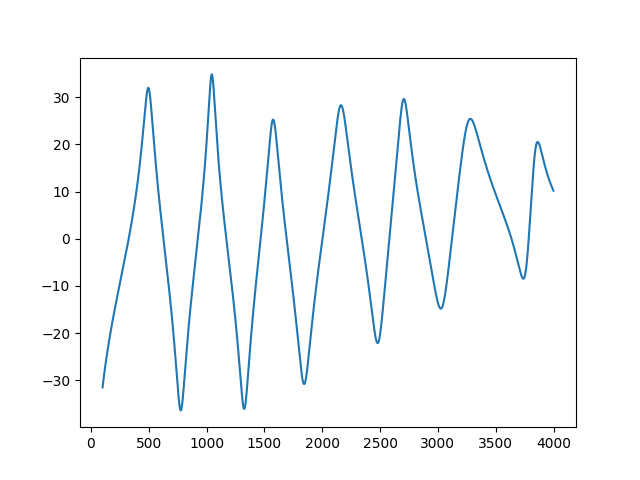

In [28]:
f = np.arange(0, 4000)
f_theorie = np.arange(100, 4000)
#zegrev p.7
l = 183e-3
D = 19e-3
R = D/2
T_celcius = 21.7

T_kelvin = T_celcius + 273.15
rho_0 = 1.292 * (273.15/T_kelvin)
S = np.pi * R**2
c = 20.05 * np.sqrt(T_kelvin)

Z_c = rho_0 * c / S # S = S_m = mouth surface
Y_c = 1/Z_c

# Cylindre + stack safe
# Q_n = np.array([5, 13, 12, 17, 20])
# f_n = np.array([190, 877, 1770, 2710, 3555])
# Y_n = Y_c * np.array([1.5e9, 3.7e9, 4.5e9, 6.5e9, 4e9])

# Cylindre
# Q_n = np.array([8, 75, 70, 50, 50])
# f_n = np.array([180, 898, 1810, 2720, 3630])
# Y_n = Y_c * np.array([15e8, 4.5e9, 5e9, 6e9, 6e9])

# Cylindre + bec (sans le 1er pic bruité)
# Q_n = np.array([16, 57, 65, 38, 60, 45, 50])
# f_n = np.array([508, 1045, 1592, 2160, 2708, 3308, 3879])
# Y_n = Y_c * np.array([3.2e9, 3e9, 3e9, 4e9, 4e9, 5e9, 6e9])

# Cylindre + bec+ stack (sans le 1er pic bruité)
Q_n = np.array([7, 20, 20, 20, 30, 20, 40])
f_n = np.array([498, 1045, 1575, 2161, 2702, 3265, 3845])
Y_n = Y_c * np.array([3.2e9, 2.7e9, 2.5e9, 4e9, 3.5e9, 5e9, 2e9])

w_n = 2 * np.pi * f_n
w = 2 * np.pi * f_theorie

Y = np.sum([
    1j * w * Y_n[n] /(w_n[n]**2 - w**2 + 1j * 1/Q_n[n] * w_n[n] * w) for n in range(len(w_n))], axis=0
)

plt.figure()
plt.plot(f_theorie, 20*np.log(np.abs(Y)), label="theorie")
def load_capteurz(filename):
    s = open(filename).read().splitlines()
    freq = []
    data = []
    for l in s:
        f, real, imag = [float(i) for i in l.replace(",", ".").split()]
        freq.append(f)
        data.append(real+imag*1j)


    return np.array(freq), np.array(data)

freq, imp = load_capteurz("cylindre+stack+bec4k/Impedance.txt")
adm = 1/imp
# plt.plot(freq, 20*np.log(abs(imp/max(imp))), label="mesure")
plt.plot(freq, 20*np.log(abs(adm)), label="mesure", alpha=.7)
plt.ylabel("Module de l'admittance")
plt.xlabel("Fréquence")
plt.title("")
plt.legend()
plt.show()


In [26]:
concatenated_values = [f"{f_n[i]} & {Q_n[i]} & {Y_n[i]:.2f} \\\\" for i in range(len(Q_n))]
print('\\toprule')
print('$f_n$ & $Q_n$ & $Y_n$ \\\\ \midrule')
print('\n'.join(concatenated_values))
print('\\bottomrule\\\\')


\toprule
$f_n$ & $Q_n$ & $Y_n$ \\ \midrule
508 & 16 & 2201.76 \\
1045 & 57 & 2064.15 \\
1592 & 65 & 2064.15 \\
2160 & 38 & 2752.20 \\
2708 & 60 & 2752.20 \\
3308 & 45 & 3440.25 \\
3879 & 50 & 4128.30 \\
\bottomrule\\


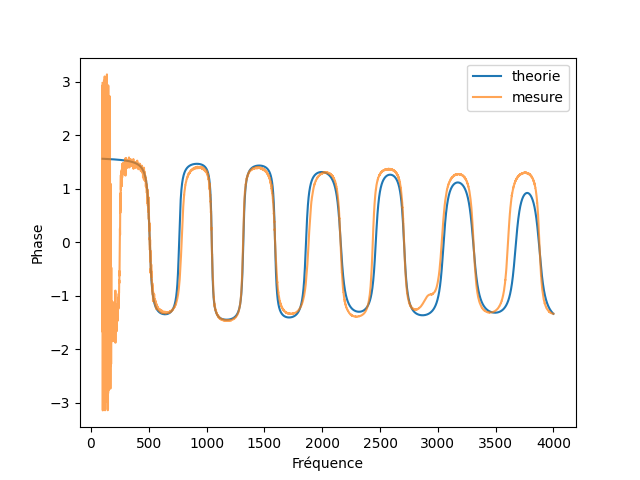

In [27]:
plt.figure()
plt.plot(f_theorie, np.angle(Y/Y_c), label="theorie")
plt.plot(freq, np.angle(adm/Y_c), label="mesure", alpha=.7)
# plt.title("Phase de l'admittance")
plt.xlabel("Fréquence")
plt.ylabel("Phase")
plt.legend()


In [6]:
mag = 20*np.log(abs(adm/Y_c))

def get_delta_f(f, f_zone, plot=False):
    domaine = np.abs(freq-f) < f_zone

    i_max = np.argmax(mag[domaine])
    f_max = freq[domaine][i_max]
    mag_max = mag[domaine][i_max]
    # print(len(domaine), freq[domaine])

    i_zone = np.where(np.diff(np.sign(mag[domaine] - mag_max +3)))[0]
    if len(i_zone) != 2:
        print("oh no", i_zone)
        i_moins, i_plus = i_zone[len(i_zone)//2 - 1], i_zone[len(i_zone)//2]
        # return
    else:
        i_moins, i_plus = i_zone
    # i_moins, i_plus = i_zone[:2]
    i_plus += 1
    f_moins, f_plus = freq[domaine][i_moins], freq[domaine][i_plus]
    mag_moins, mag_plus = mag[domaine][i_moins], mag[domaine][i_plus]
    delta_f = f_plus - f_moins
    if plot:
        plt.plot(freq[domaine], mag[domaine])
        plt.plot(f_max, mag_max, 'x')
        plt.plot([f_moins, f_plus], [mag_moins, mag_plus])
        plt.show()
    print(f"f_max={f_max} Hz, mag_max={mag_max:.2} dB, delta f (-3db) = {delta_f:.2} Hz")
    return delta_f

delta_f = get_delta_f(1770, 100)
1770/delta_f

oh no [121 127 128 297 298 299]
f_max=1766.5 Hz, mag_max=3.1e+02 dB, delta f (-3db) = 8.5e+01 Hz


20.823529411764707

$$f_{min_{n,l}} = \frac{nv_\phi}{2(l)}$$
$$f_{min_{l+\Delta l}} = \frac{nv_\phi}{2(l + \Delta l)}$$

$$f_{min_{l+\Delta l}} \simeq f_{min_{n,l}} \frac{l}{l + \Delta l}$$


In [13]:
l_flute = l + 5
delta_l = 0.81 * R
f_n * l_flute/(l_flute + delta_l)
#

array([ 189.71833252,  875.69988219, 1767.37604502, 2705.9825322 ,
       3549.72985313])

## Diagramme bifurcation

In [14]:
p_up = [0, 56.4, 71.9, 84.2, 124.3, 149.7, 189.3, 200, 212, 240, 270]
f_up = [0, np.NaN, 445.9, 467, 489.3, 499, 504, 910, 933, 969, 990]
a_up = [0, np.NaN, -40.156, -34.7, -25.4, -24.2, -24.5, -31.1, -23.7, -19.8, -16.3]

p_down = [217, 209, 182, 162, 156, 145]
f_down = [942, 933, 875, 835, 814, 496]
a_down = [-16.3, -22.3, -26.4, -30, -33.4, -33.8, -24]

11 11


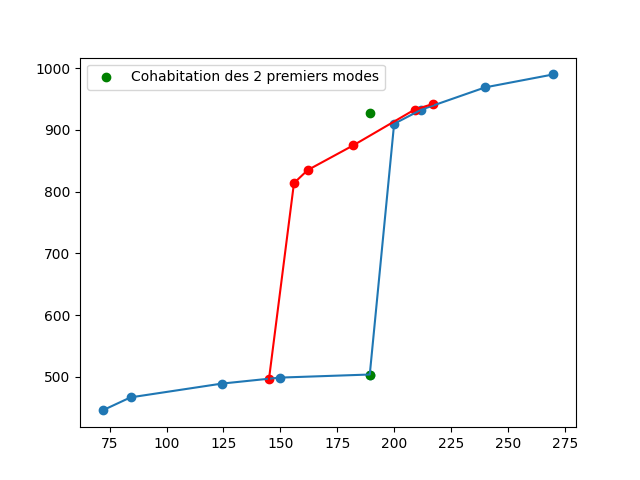

In [15]:
plt.figure()
print(len(p_up), len(f_up))
plt.plot(p_up[2:], f_up[2:])
plt.scatter(p_up[2:], f_up[2:])
plt.plot(p_down, f_down, color='r')
plt.scatter(p_down, f_down, color='r')
plt.scatter([189.3, 189.3], [504, 927], color='g', label="Cohabitation des 2 premiers modes")
plt.legend()

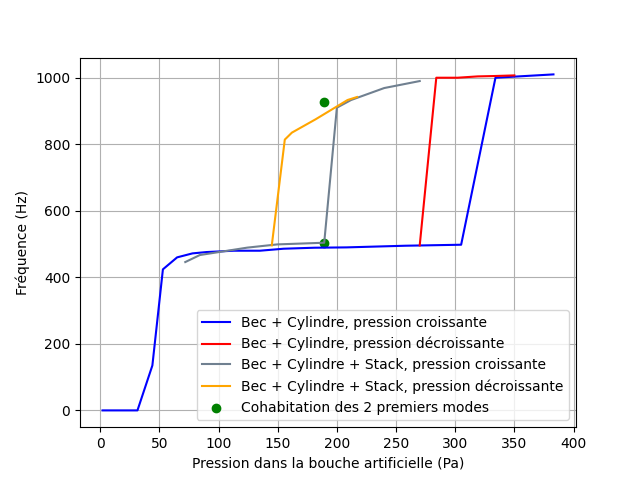

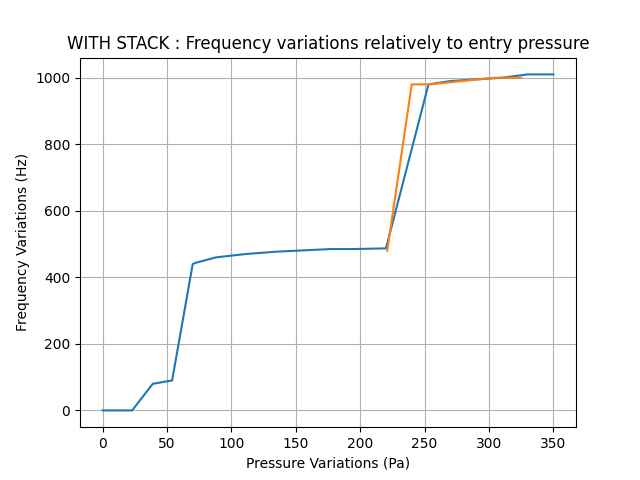

In [16]:
# Mesures d'Alfred

import numpy as np
import matplotlib.pyplot as plt

##### ---------------------------- DATA ACQUISITION
### NO STACK
# Battement à deltaP=324.0,
NS_delta_p = [2.0, 31.5, 44.1, 53.0, 65.0, 78.0, 90.0, 113.0, 135.0, 155.0, 181.0, 208.0, 258.0, 305.0, 334.0, 383.0, 350.0, 332.0, 319.0, 302.0, 284.0, 270.0]
NS_amplitude_mvolts = [5.0, 10.0, 12.0, 20.0, 35.0, 70.0, 100.0, 150.0, 170.0, 180.0, 200.0, 215.0, 240.0, 260.0, 500.0, 600.0, 530.0, 490.0, 450.0, 420.0, 360.0, 240.0]
NS_frequency_Hz = [0.0, 0.0, 135.0, 424.0, 460.0, 472.0, 476.0, 480.0, 480.0, 486.0, 489.0, 490.0, 495.0, 498.0, 1000.0, 1010.0, 1007.0, 1005.0, 1004.0, 1000.0, 1000.0, 496.0]

NS_delta_p_forward = NS_delta_p[:-6]
NS_delta_p_backwards = NS_delta_p[-6:]
NS_amplitude_mvolts_forward = NS_amplitude_mvolts[:-6]
NS_amplitude_mvolts_backwards = NS_amplitude_mvolts[-6:]
NS_frequency_Hz_forward = NS_frequency_Hz[:-6]
NS_frequency_Hz_backwards = NS_frequency_Hz[-6:]

### WITH STACK
# Battement à deltaP=236.0,
WS_delta_p = [0.0, 10.0, 23.0, 39.0, 54.0, 70.0, 72.6, 88.0, 111.0, 134.4, 177.0, 190.0, 194.0, 220.0, 253.0, 270.0, 310.0, 330.0, 350.0, 325.0, 304.0, 254.0, 240.0, 221.0]
WS_amplitude_mvolts = [10.0, 10.0, 10.0, 15.0, 15.0, 26.0, 38.0, 40.0, 55.0, 72.0, 83.0, 85.0, 96.0, 100.0, 120.0, 150.0, 190.0, 215.0, 250.0, 210.0, 190.0, 115.0, 150.0, 100.0]
WS_frequency_Hz = [00.0, 00.0, 00.0, 80.0, 90.0, 440.0, 444.0, 460.0, 470.0, 477.0, 485.0, 485.0,485.0, 487.0, 980.0, 990.0, 1000.0,1010.0, 1010.0, 1000.0, 1000.0, 980.0, 980.0, 480.0]

WS_delta_p_forward = WS_delta_p[:-5]
WS_delta_p_backwards = WS_delta_p[-5:]
WS_amplitude_mvolts_forward = WS_amplitude_mvolts[:-5]
WS_amplitude_mvolts_backwards = WS_amplitude_mvolts[-5:]
WS_frequency_Hz_forward = WS_frequency_Hz[:-5]
WS_frequency_Hz_backwards = WS_frequency_Hz[-5:]


##### ---------------------------- PLOTTING
plt.figure()
plt.plot(NS_delta_p_forward, NS_frequency_Hz_forward, color='b', label="Bec + Cylindre, pression croissante")
# plt.scatter(NS_delta_p_forward, NS_frequency_Hz_forward, color='b')
plt.plot(NS_delta_p_backwards, NS_frequency_Hz_backwards, color='r', label="Bec + Cylindre, pression décroissante")
# plt.scatter(NS_delta_p_backwards, NS_frequency_Hz_backwards, color='r')

plt.plot(p_up[2:], f_up[2:], color='slategrey', label="Bec + Cylindre + Stack, pression croissante")
# plt.scatter(p_up[2:], f_up[2:], color='slategrey')
plt.plot(p_down, f_down, color='orange', label="Bec + Cylindre + Stack, pression décroissante")
# plt.scatter(p_down, f_down, color='orange')

plt.scatter([189.3, 189.3], [504, 927], color='g', label="Cohabitation des 2 premiers modes")


plt.grid()
plt.xlabel("Pression dans la bouche artificielle (Pa)")
plt.ylabel("Fréquence (Hz)")
plt.legend()
# plt.title("NO STACK : Frequency variations relatively to entry pressure")
plt.show()

plt.figure()
plt.plot(WS_delta_p_forward, WS_frequency_Hz_forward)
plt.plot(WS_delta_p_backwards, WS_frequency_Hz_backwards)
plt.grid()
plt.xlabel("Pressure Variations (Pa)")
plt.ylabel("Frequency Variations (Hz)")
plt.title("WITH STACK : Frequency variations relatively to entry pressure")
plt.show()